## Tensorflow for Computer Vision

In [1]:
import datetime
f"Notebook last run on: {datetime.datetime.now()}"

'Notebook last run on: 2025-02-07 10:27:00.134218'

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import optimizers
from keras import losses
from keras import activations
from keras import callbacks
from keras import utils
from keras import metrics
from keras import applications
from keras import regularizers
from keras import preprocessing

from keras import datasets

# import random

2025-02-07 10:27:00.987509: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738898821.036847   20591 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738898821.049886   20591 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-07 10:27:01.101501: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### *Get the data*

In [3]:
# import zipfile

# # Download zip file of pizza and steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

### *Inspect the data*

In [4]:
!ls -l pizza_steak/train/steak/

total 40472
-rw-rw-r-- 1 lovecrush lovecrush  36185 Feb  4 19:42 1000205.jpg
-rw-rw-r-- 1 lovecrush lovecrush  34497 Feb  4 19:42 100135.jpg
-rw-rw-r-- 1 lovecrush lovecrush 116802 Feb  4 19:42 101312.jpg
-rw-rw-r-- 1 lovecrush lovecrush  56754 Feb  4 19:42 1021458.jpg
-rw-rw-r-- 1 lovecrush lovecrush  34143 Feb  4 19:42 1032846.jpg
-rw-rw-r-- 1 lovecrush lovecrush  24688 Feb  4 19:42 10380.jpg
-rw-rw-r-- 1 lovecrush lovecrush  37134 Feb  4 19:42 1049459.jpg
-rw-rw-r-- 1 lovecrush lovecrush  49841 Feb  4 19:42 1053665.jpg
-rw-rw-r-- 1 lovecrush lovecrush  59983 Feb  4 19:42 1068516.jpg
-rw-rw-r-- 1 lovecrush lovecrush  28996 Feb  4 19:42 1068975.jpg
-rw-rw-r-- 1 lovecrush lovecrush  29525 Feb  4 19:42 1081258.jpg
-rw-rw-r-- 1 lovecrush lovecrush  49577 Feb  4 19:42 1090122.jpg
-rw-rw-r-- 1 lovecrush lovecrush  59976 Feb  4 19:42 1093966.jpg
-rw-rw-r-- 1 lovecrush lovecrush  60253 Feb  4 19:42 1098844.jpg
-rw-rw-r-- 1 lovecrush lovecrush  69843 Feb  4 19:42 1100074.jpg
-rw-rw-r-- 1 love

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# Get the class name (programmatically, this is much more helpful with a longer list of classes)
class_names = os.listdir("pizza_steak/train")
class_names

['pizza', 'steak']

In [7]:
# # View an image
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# import random

# def view_random_image(target_dir, target_class):
#   # Setup target directory (we'll view images from here)
#   target_folder = target_dir+target_class

#   # Get a random image path
#   random_image = random.sample(os.listdir(target_folder), 1)

#   # Read in the image and plot it using matplotlib
#   img = mpimg.imread(target_folder + "/" + random_image[0])
#   plt.imshow(img)
#   plt.title(target_class)
#   plt.axis("off");

#   print(f"Image shape: {img.shape}") # show the shape of the image

#   return img

In [8]:
# # View a random image from the training dataset
# img = view_random_image(target_dir="pizza_steak/train/",
#                         target_class="steak")


In [9]:
# img     # image is actually just a big array/tensor

In [10]:
# img / 255.0 # scale the image

### *End-to-end*

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(16)

# Preprocessing data (get all of the pixels values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),          # convert all image to be 224x224
                                               batch_size=32,                   # number of images to process at a time
                                               class_mode="binary",             # type of problem we're working on
                                               seed=16)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                seed=16)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# Create a CNN model (TinyVGG)
TinyVGG_model = keras.Sequential([
    layers.Conv2D(filters=10, kernel_size=3, activation=activations.relu, input_shape=(224, 224, 3)),
    layers.Conv2D(filters=10, kernel_size=3, activation=activations.relu),
    layers.MaxPool2D(pool_size=2, padding="valid"),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(1, activation=activations.sigmoid)       # binary activation output
    
])

# Compile the model
TinyVGG_model.compile(optimizer=optimizers.Adam(),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.binary_accuracy])

TinyVGG_model.summary()

/home/lovecrush/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1738898834.851840   20591 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 770 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Fit the model
# TinyVGG_history = TinyVGG_model.fit(train_data,
#                                     epochs=5,
#                                     steps_per_epoch=len(train_data),
#                                     validation_data=valid_data,
#                                     validation_steps=len(valid_data))

In [14]:
TinyVGG_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,101 (121.49 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

### *Data augmentation*

In [15]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,    # rotate the image slightly
                                            shear_range=0.2,       # shear the image
                                            zoom_range=0.2,        # zoom into the image
                                            width_shift_range=0.2, # shift the image width ways
                                            height_shift_range=0.2, # shift the image height ways
                                            horizontal_flip=True)  # flip the image on its horizontal axis


In [16]:
# Import data from directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    seed=16,
                                                                    shuffle=False) # shuffle=False for demonstration purposes

# Create non-augmented data batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=16)



Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [17]:
# Get the data batch samples
images, labels = next(train_data)                                  # get the next batch of images/labels
augmented_images, augmented_labels = next(train_data_augmented)    # labels aren't augmented, only images

In [22]:
# # Show original image and augmented image
# random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
# plt.imshow(images[random_number])
# plt.title(f"Original image")
# plt.axis(False)
# plt.figure()
# plt.imshow(augmented_images[random_number])
# plt.title(f"Augmented image")
# plt.axis(False);

NameError: name 'random' is not defined

In [19]:
# import os
# os.environ['TF_XLA_FLAGS'] = '--tf_xla_auto_jit=0'

In [21]:
import tensorflow as tf

# Enable XLA JIT compilation
tf.config.optimizer.set_jit(True)


In [ ]:
print(f"XLA JIT Enabled: {tf.config.optimizer.get_jit()}")


In [ ]:
# export TF_XLA_FLAGS="--tf_xla_auto_jit=2 --tf_xla_cpu_global_jit"
# export XLA_FLAGS="--xla_gpu_cuda_data_dir=/usr/local/cuda"


In [20]:
# Create the model
TinyVGG_augmented_model = keras.Sequential([
    layers.Conv2D(10, 3, activation=activations.relu, input_shape=(224, 224, 3)),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(1, activation=activations.sigmoid)
])

# Compile the model
TinyVGG_augmented_model.compile(optimizer=optimizers.Adam(),
                                loss=losses.binary_crossentropy,
                                metrics=[metrics.binary_accuracy],
                                jit_compile=True)           # enble XLA JIT

# Fit the model
TinyVGG_augmented_history = TinyVGG_augmented_model.fit(train_data_augmented,
                                                        epochs=2,
                                                        steps_per_epoch=len(train_data_augmented),
                                                        validation_data=valid_data,
                                                        validation_steps=len(valid_data))


/home/lovecrush/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


I0000 00:00:1738898849.856206   20677 service.cc:148] XLA service 0x7e8a24005180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738898849.856246   20677 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-02-07 10:27:30.083874: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738898851.442112   20677 cuda_dnn.cc:529] Loaded cuDNN version 90700
2025-02-07 10:27:32.526593: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

 2/47 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - binary_accuracy: 0.0703 - loss: 0.7289 

I0000 00:00:1738898859.071629   20677 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


24/47 ━━━━━━━━━━━━━━━━━━━━ 18s 785ms/step - binary_accuracy: 0.4402 - loss: 0.7028

2025-02-07 10:27:58.533957: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[28,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-07 10:27:58.810454: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[28,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[28,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 726ms/step - binary_accuracy: 0.4756 - loss: 0.6991

2025-02-07 10:28:13.863970: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,10,222,222]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,224,224]{3,2,1,0}, f32[10,3,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-02-07 10:28:14.158499: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,10,220,220]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,10,222,222]{3,2,1,0}, f32[10,10,3,3]{3,2,1,0}, f32[10]{0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend

47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 857ms/step - binary_accuracy: 0.4757 - loss: 0.6990 - val_binary_accuracy: 0.5000 - val_loss: 0.6913
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 30s 638ms/step - binary_accuracy: 0.4937 - loss: 0.6927 - val_binary_accuracy: 0.5440 - val_loss: 0.6859
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 792ms/step - binary_accuracy: 0.5290 - loss: 0.6955 - val_binary_accuracy: 0.6500 - val_loss: 0.6788
Epoch 4/5
11/47 ━━━━━━━━━━━━━━━━━━━━ 29s 809ms/step - binary_accuracy: 0.5572 - loss: 0.6921

KeyboardInterrupt: 

In [17]:
import tensorflow as tf
print(tf.sysconfig.get_build_info())


OrderedDict({'cpu_compiler': '/usr/lib/llvm-18/bin/clang', 'cuda_compute_capabilities': ['sm_60', 'sm_70', 'sm_80', 'sm_89', 'compute_90'], 'cuda_version': '12.5.1', 'cudnn_version': '9', 'is_cuda_build': True, 'is_rocm_build': False, 'is_tensorrt_build': False})


### *Multi-class classification*

In [20]:
# import zipfile

# # Downloadzip file of 10 food classes images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()


--2025-02-03 14:28:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4005:824::201b, 2404:6800:4005:825::201b, 2404:6800:4005:826::201b, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4005:824::201b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  3.20MB/s    in 2m 21s  

2025-02-03 14:31:02 (3.52 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [21]:

# Remove the original zip file
!rm 10_food_classes_all_data.zip


In [22]:
import os

# Walk through 10 food classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

    

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

In [23]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [24]:
# Get the classname for the subdirectories
class_names = os.listdir(train_dir)
class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

Image shape: (384, 512, 3)


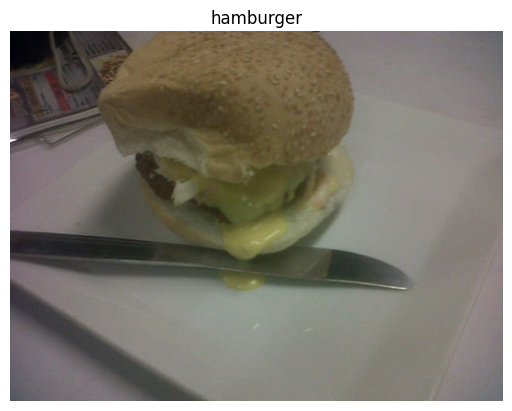

In [25]:
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [26]:
from tensorflow. keras.preprocessing.image import ImageDataGenerator

# Scale the data and create generators instance
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical",
                                               seed=16)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="categorical",
                                            seed=16)



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [27]:
TinyVGG = keras.Sequential([
    layers.Conv2D(10, 3, activation=activations.relu, input_shape=(224, 224, 3)),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.MaxPool2D(2),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.Conv2D(10, 3, activation=activations.relu),
    layers.MaxPool2D(2),
    layers.Flatten(),
    layers.Dense(10, activation=activations.softmax)
])

# Compile the model
TinyVGG.compile(optimizer=optimizers.Adam(),
                loss=losses.categorical_crossentropy,
                metrics=[metrics.categorical_accuracy])



In [28]:
# Fit the model
TinyVGG_history = TinyVGG.fit(train_data,
                              epochs=2,
                              steps_per_epoch=len(train_data),
                              validation_data=test_data,
                              validation_steps=len(test_data))

Epoch 1/2
 17/235 ━━━━━━━━━━━━━━━━━━━━ 32s 150ms/step - categorical_accuracy: 0.1263 - loss: 2.5711

E0000 00:00:1738567876.429054    4556 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738567876.556458    4556 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738567876.808153    4556 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738567876.943218    4556 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1738567877.082210    4556 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000

235/235 ━━━━━━━━━━━━━━━━━━━━ 55s 219ms/step - categorical_accuracy: 0.1514 - loss: 2.2999 - val_categorical_accuracy: 0.2488 - val_loss: 2.0777
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - categorical_accuracy: 0.0000e+00 - loss: 0.0000e+00


2025-02-03 14:32:03.996290: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 13821979290266343503
2025-02-03 14:32:03.996323: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 7751256700373457104


In [29]:
TinyVGG.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       280,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 851,762 (3.25 MB)

 Trainable params: 283,920 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 567,842 (2.17 MB)

In [38]:
# TinyVGG_model.evaluate(test_data)

### *Adjust model parameters*

### *Saving our model*

In [41]:
TinyVGG_model.save("TinyVGG_model.keras")

In [45]:
loaded_model = keras.models.load_model("TinyVGG_model.keras")

### *PyTorch code with the same similar function*

In [1]:
import torch
from torch import nn
from torch import optim
from torch import utils
from torch.utils.data import DataLoader

class TinyVGG(nn.Module):
    def __init__(self):
        super(TinyVGG, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(10, 10, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv3 = nn.Conv2d(10, 10, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(10, 10, kernel_size=3, padding=1)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(10 * 56 * 56, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.softmax(x)
        return x

# Create the model
model = TinyVGG()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

# Training loop
num_epochs = 2
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}")

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Validation Accuracy: {100 * correct / total}%")


import sklearn.neural_network

NameError: name 'train_data' is not defined